## As explained in our Python notebook, visualization is the first step.

While somewhat redundant with our python notebook, we also first explore here some of the visualization tools offered by R, before proceeding to multiple imputation.

In [46]:
# Let's load the data
data <- read.csv("data/dummy.csv", header=TRUE)

# we told R that the dataset has a header

These are the steps you need to follow in assessing the method of missingness in your data (MCAR, MAR or MNAR):

1. Ask and discuss this question at length with the data collectors, and/or the domain experts; if they tell you the data is MAR or MNAR:
2. Visualize your data, in particular through multivariate visualizations showing you how your data is missing across your entire dataset
3. Run Little's MCAR test to test if your data is MCAR or not; if this test concludes that your data is not MCAR:
4. Use VIM package to create marginplots and boxplots of your key variables with missing data against your outcome variable for example, and see if you identify key differences between data with observed and with missing values, with respect to your outcome variable.
5. Conclude based on all these steps, whether you feel comfortable assuming that your data is MAR, or not.

Having seen that we have missing data in our python notebook, we now first apply Little's MCAR test. This test allows us to check if our data is MCAR, which in practice is almost never the case, or not. 

There is no test for whether the data is MAR or not. Deciding whether the data is MAR or MNAR remains a heuristic, soft exercise, requiring both data analyst and domain expert/data collector.

In [2]:
# we will use the BaylorEdPsych package, which implements Little's MCAR test

# https://www.jstor.org/stable/2290157?seq=1#page_scan_tab_contents

# https://cran.r-project.org/web/packages/BaylorEdPsych/BaylorEdPsych.pdf

install.packages("BaylorEdPsych", repos='http://cran.us.r-project.org')
install.packages("mvnmle")

library("BaylorEdPsych")
library("mvnmle")
    
# As an aside to this tutorial/notebook: unfortunately, for those using the popular R Studio software and note 
# jupyer notebooks, R studio truncates your output. To see your entire output, you need to print your console to an 
# external file:

# sink("output.txt")
# print(LittleMCAR(dataset))
# sink()

Installing package into ‘/Users/aa/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Installing package into ‘/Users/aa/Library/R/3.4/library’
(as ‘lib’ is unspecified)


In [45]:
LittleMCAR(data)

this could take a while

,X,Gender,Tumor_type,Tumor_grade,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,⋯,Tumor_Location,Tumor_Position,Surgery_type,Age_surgery,life_expectancy,IDH,TERT,IDH_TERT,X1p19q_codel,IK
Number Missing,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,35.0000000,57.0000000,51.0000000
Percent Missing,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0.3465347,0.5643564,0.5049505
,X,Gender,Tumor_type,Tumor_grade,Gene_P53,Gene_Mgmt,Gene_Egfr,Gene_Mdm2,Gene_Cdk4,Gene_P16,⋯,Tumor_Location,Tumor_Position,Surgery_type,Age_surgery,life_expectancy,IDH,TERT,IDH_TERT,X1p19q_codel,IK
4,3,2,5,4,4,3,3,1,3,3,⋯,1,3,3,41,371,1,1,4,0,80
17,16,1,5,3,1,3,2,3,3,3,⋯,1,3,4,53,568,3,1,4,0,90
18,17,2,5,4,3,2,1,1,3,1,⋯,1,4,2,50,2087,2,2,4,0,90
33,32,2,7,4,3,1,1,3,1,1,⋯,1,3,4,54,4,3,2,3,0,90
54,53,2,5,4,3,3,1,3,1,1,⋯,1,3,3,76,321,3,2,4,0,90
59,58,1,5,3,3,1,3,1,1,3,⋯,1,3,4,57,403,3,1,4,0,70
62,61,1,1,4,3,1,3,1,1,3,⋯,1,4,4,28,389,3,1,4,0,90


The output of Little's MCAR test follows a typical chi square test. The null hypothesis for this test is that the data is MCAR.

As such, we focus on the p value to know if we can reject the null hypothesis or not. Usually, if we choose a threshold of 0.05, we can reject the null hypothesis that the data is MCAR if the p value is below 0.05. Here, we can see that the p value is of 0.54, meaning that we cannot reject the null hypothesis that the data is MCAR. We can conclude with our desired confidence level (95% since we chose a p threshold of 0.05) that our data is MCAR.

In [47]:
# Let's reload the data, with one more option this time:

data <- read.csv("data/dummy.csv", na.strings = '', header=TRUE)

# we told R that missing values are coded by absence of any symbol (na.strings = ''), and that the dataset has a header

### VIM Package

The VIM package was initially developed for data imputation. Its unique strength is in missing data visualization, as well as in non parametric data imputation:

https://cran.r-project.org/web/packages/VIM/VIM.pdf

In [49]:
#load VIM library for missing data visualization
library(VIM)

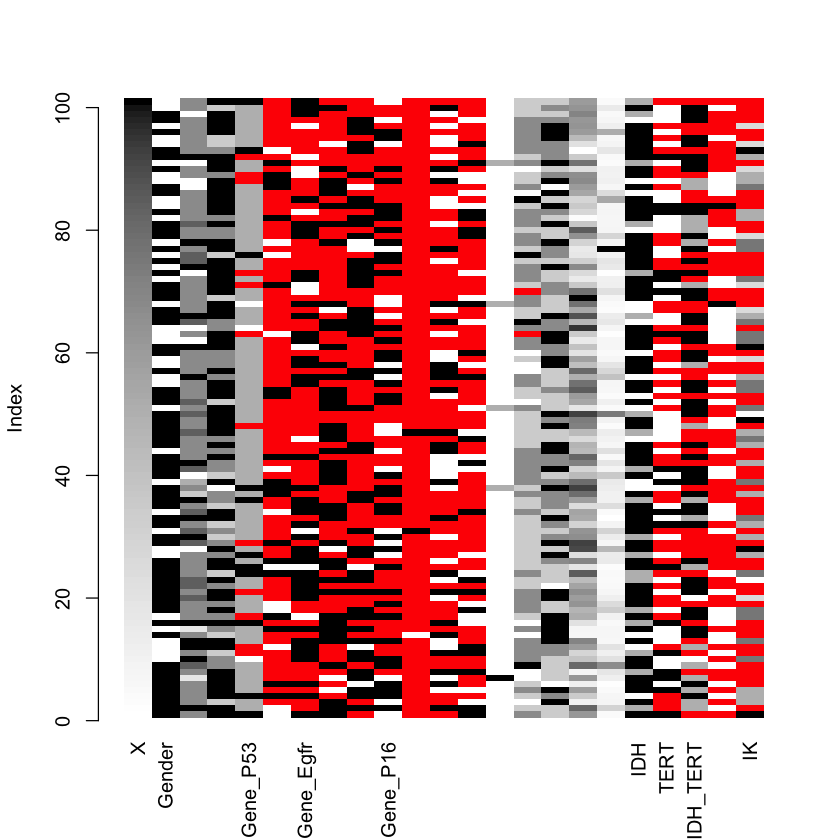

In [50]:
matrixplot(data, labels=TRUE)

This is a high level visualization of our observed vs missing observations across our dataset (as we had using the Python missing data package as well).

In red, we have missing values across our variables, and in black, observed values across our variables.

Here we look for the magnitude of missing data per variable, and for patterns to investigate further.

In [51]:
# let's quantify the number of missing values per variable
summary(data)

       X       Gender                            Tumor_type  Tumor_grade   
 Min.   :  0   F:36   astrocytome                     : 9   Min.   :1.000  
 1st Qu.: 25   M:65   astrocytome gémistocytique (=A2): 2   1st Qu.:3.000  
 Median : 50          astrocytome pilocytique         : 1   Median :4.000  
 Mean   : 50          gangliogliome                   : 1   Mean   :3.436  
 3rd Qu.: 75          GBM                             :58   3rd Qu.:4.000  
 Max.   :100          gliome                          :15   Max.   :4.000  
                      oligo                           :15                  
   Gene_P53        Gene_Mgmt     Gene_Egfr     Gene_Mdm2     Gene_Cdk4 
 ALTERE: 3   METHYLE    :12   AMPLIFIE:12   AMPLIFIE: 5   AMPLIFIE: 6  
 NC    :75   NON METHYLE:19   NORMAL  :40   NORMAL  :43   NORMAL  :45  
 NORMAL:11   NA's       :70   NA's    :49   NA's    :53   NA's    :50  
 NA's  :12                                                             
                                

Warning message in plot.aggr(res, ...):
“not enough vertical space to display frequencies (too many combinations)”

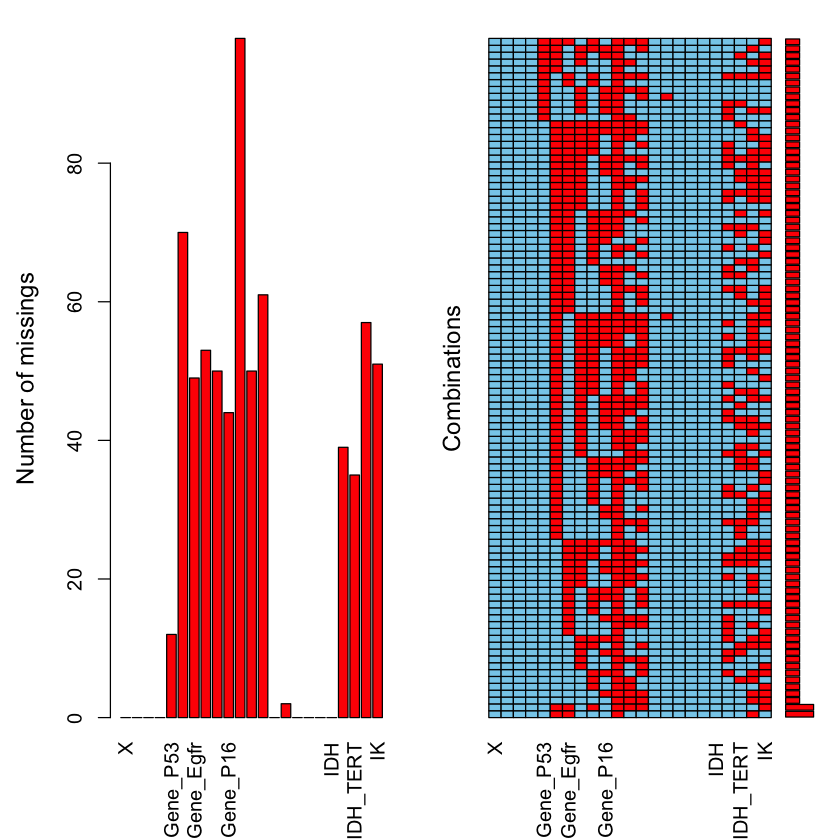

In [52]:
# now let's try a frequency plot of missing values per variable

aggr(data, prop = F, numbers = T)

This type of visualization gives us two things:

1. it ranks for us the variables in our dataset by proportion of missing observation (left part)
2. and especially it allows us to see patterns of joint missingness among variables (right part). Here, it gives us the frequencies of multivariate patterns of missing data i.e. frequency with which two variables are missing at the same time.

blue refers to observed data and red to missing data

In [53]:
#we can further customize this graph using the sortVars = TRUE option. try it!

Now let's study some of the variables with missing values individually. As always in descriptive statistics, we start with univariate (each variable) analysis, and then move to bivariate and multivariate relationships.

### Univariate analysis of variables with missing data

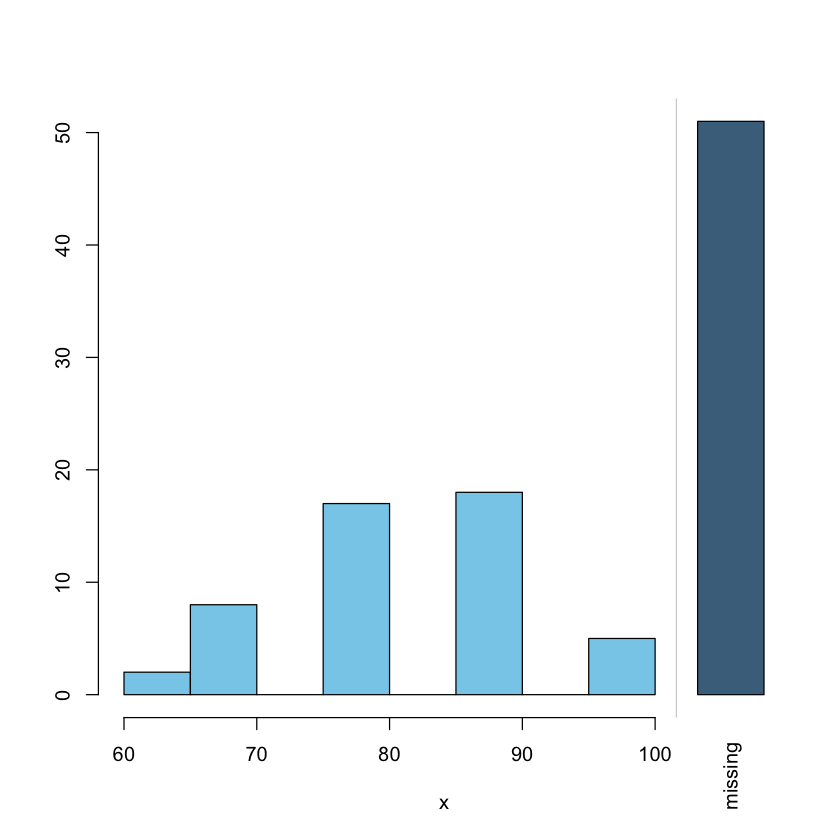

In [73]:
# Quantitative variables: use a histogram with the "histMiss()" function of the VIM package.

vars <- c("IK")
histMiss(data[,vars])

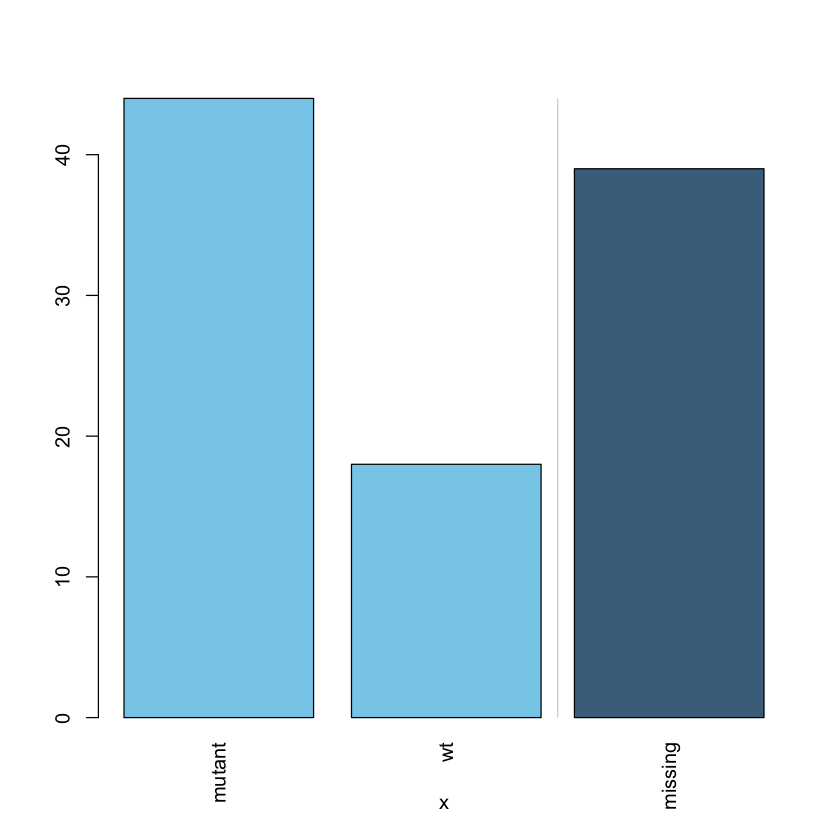

In [74]:
# Categorical variables: use a barplot with the "barMiss()" function of the VIM package.

vars <- c("TERT")
barMiss(data[,vars], selection="any")

### Multivariate analysis of variables with missing data

As in all data analysis, after you conduct univariate analysis, you move to multivariate relationships between variables.

This is where the heuristics will come in, and how we will aim to assess, AFTER already discussing the missing data with the domain experts/data collectors and running Little's MCAR test, whether we can consider the missing data to be MAR (missing at random), or whether we pick up significant bias (and go back to the naughty domain experts who swore on everything they hold dear that it is MAR).

Let's say we want to narrow down on a pair of variables. A good idea is to test various key variables with a high proportion of missing data, against the response variable in your study.

Rules: 

Two quantitative variables: you draw a margin plot

A categorical and a quantitative variable: you draw a boxplot

Assuming two quantitative variables, you draw a margin plot. Like so:

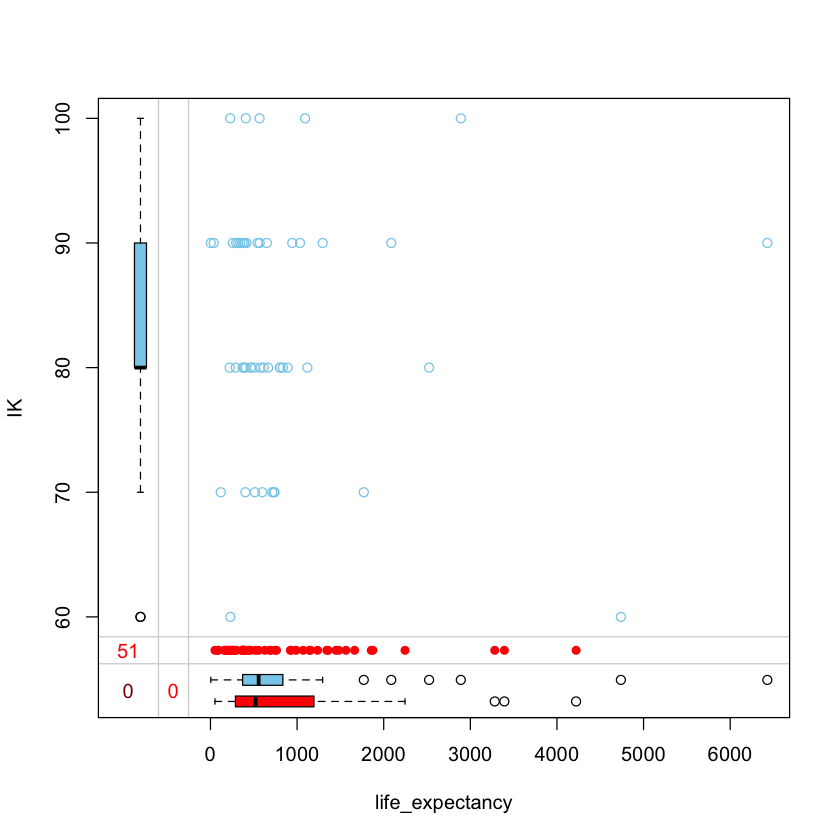

In [75]:
marginplot(data[,c("life_expectancy","IK")])

blue box plot in the margin to the left and at the bottom of the graph: distribution of values of a variable, given the other variable is observed

red box plot in the margin to the left and at the bottom of the graph: distribution of values of a variable, given the other variable is missing (here there is no red box plot in left margin, because all observations have an observed life expectancy i.e. there are no observations with an observed IK score, but with a missing life expectancy

51 means that there are 51 observations for which we have an observed life expectancy, but a missing IK score. 
0 under it means that there are no observations with missing values for both IK score and life expectancy.

If your data is MCAR, you expect the blue and red box plots to be identical. This is rarely the case.

If your data is MAR, we expect them to be similar, but not the same.

In comparing the blue and red box plots, I focus on the mean first, and the dispersion around the mean second. You study them as any normal box plot i.e. the black line inside the box plot is the median, the box plot represents the interquartile range (third quartile and first quartile around the median), and we have the extreme values plotted outside of the box itself.

Assuming a quantitative and a categorical variable, you draw a box plot. Like so:

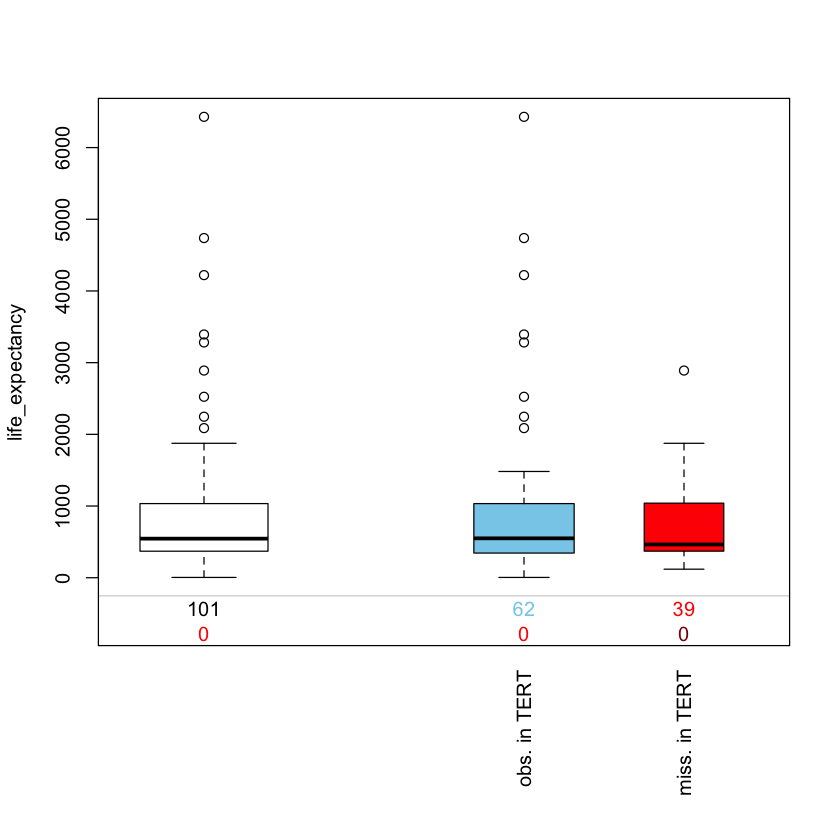

In [92]:
pbox(data[c("life_expectancy", "TERT")])

You read these box plots just as explained for the previous graph, the margin plot.

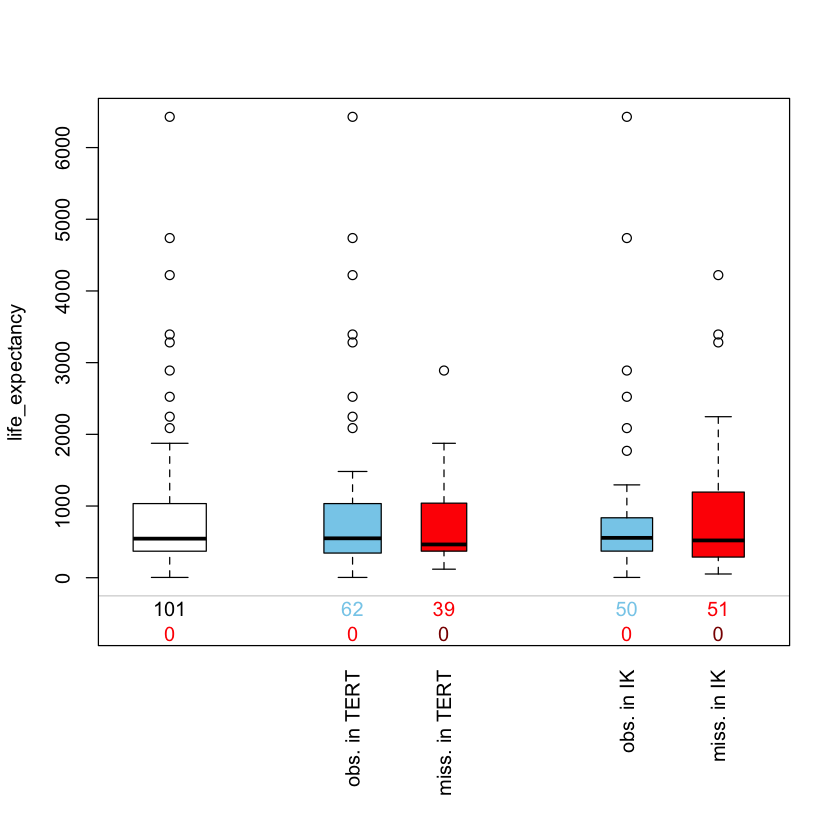

In [91]:
# Parallel boxplots

vars <- c("life_expectancy", "IDH", "TERT", "IK")
pbox(data[,vars], selection="none")

# Note, changing from the normal boxplot to the parallel boxplot method 
# is just a matter of changing the parameter selection to none.

We encourage you to go further by parsing the VIM package manual:

https://cran.r-project.org/web/packages/VIM/VIM.pdf

**What other ways of exploring/describing missing data do we have?**

1. Counts by reason of missingness
2. Kaplan-Meier plot by treatment group of the probability of remaining in the study over time
3. Plot of mean outcome over time by selected categories of discontinuation i.e. subjects discontinuing showing a worse outcome at that point than completers
4. Spaghetti plots: plots of outcome over time with one line per subject (randomly selected or completers vs drop outs…)
5. Logistic regression with missingness at end of study as the dependent variable. Investigating variables that may explain the missingness and how they are related to it.

## Multiple imputation

To understand what drove the development of multiple imputation, we need to look at a common flaw of all imputation methods reviewed until here. 
They all lead us to analyze the final dataset as if it were a complete dataset. 
None of them takes into account the uncertainty present from the missing values in the original dataset. 
Such analyses invariably lead to overestimated test statistics / underestimated standard errors. 

All multiple imputation methods therefore have two goals, namely allowing the researcher to 
1. arrive at unbiased estimates, and 
2. take into account the uncertainty stemming from the missing data present in the initial dataset.

Multiple imputation is, at this day, the only statistically robust method of handling missing data. It always follows the following process:

1. Choose a statistically robust multiple imputation method (for us we always choose MICE, but give you below the necessary code for others as well)
2. Generate, using the method chosen in 1., a certain number of complete (imputed) datasets. The number of datasets you need depends on the amount of missing data you have - see our Q&A at the end for more
3. Analyse each dataset separately, applying the modelling you want (i.e. linear regression)
4. Combine/pool/aggregate together the results of your separate analyses, following Rubin's rules

Note: Do not average the multiply imputed data and then analyze the averages as if it were complete! Why? This would result in incorrect standard errors, confidence intervals, and p values. It would present the same drawbacks as single imputation.

## Multiple imputation methods

Multiple imputation methods can be divided between parametric and non parametric ones. 

**parametric**: assume data follows an underlying model/distribution. Typically this would be that the data follows a multivariate normal distribution for example.

Maximum likelihood, Multiple imputation

**semi-parametric**: relax the assumptions that the data follows an underlying model/distribution

Multiple imputation by chained equations MICE (also called fully conditional specification or FCS)

**non parametric**: no assumption about the data is made

KNN imputation, hot deck imputation

## Parametric methods overview

**Keep in mind: each of these methods is statistically robust, and there is no "better" one. We discarded maximum likelihood methods because they do not output standard errors, which is a problem for us. And we chose MICE among the remaining because it does not need to make the multivariate normal assumption for the dataset - this is particularly useful when dealing with large amounts of categorical variables and large datasets in general. Non parametric methods remain less well studied in the statistical community at this point, but evidence suggest they are indeed robust as well, under certain conditions. There is no need, if you choose MICE for example, to hesitate each time between all the methods available - they are all robust.**

**Maximum likelihood**

The EM algorithm
The EM algorithm consists of two steps, repeated iteratively until convergence to the ML estimates:

1. the expectation step
This step is in practice a regression step, where we apply listwise deletion or pairwise deletion to the dataset, and then regress the missing data points for each variable on all the other variables.
The algorithm assigns starting values for the unknown parameters: these will be the sample means and covariance. They will be obtained through standard regression means, after applying either of listwise deletion or pairwise deletion.
With these starting parameters, it will calculate the coefficients of the regression of the missing values for one variable on all the other variables.
Using these regression coefficients, it will then impute the missing values for that variable.
This will be done for each variable with missing data.

2. After the expectation step is completed, the maximization step will calculate new parameters, means and covariances, using both the imputed data and the nonmissing data.

The algorithm then performs again the expectation step, calculating new parameter estimates, regression coefficients, and imputed data.

The expectation and maximization steps are repeated until the algorithm converges, which we know because at convergence the estimates will change very little from one iteration to the next.

Problems: this method does not output standard error estimates. Mostly suitable for linear regression and linear modelling, for which adaptations and examples of handling missing data through ML have been developed.

**Multiple imputation**

The MI algorithm:

Step 1: Impute all missing values in your dataset using an appropriate model. There are several robust models, what they all have in common is that they all incorporate a random variation in their estimates for the missing data. This is why they will reflect the uncertainty present in your original dataset, and this is why no two datasets will be the same after imputation, with regards to the originally missing values.

Step 2: Perform this imputation m times, hence generating m complete datasets, each slightly different. It is this variability that will adjust the standard errors upwards.

Step 3: Apply your analysis to each dataset.

Step 4: Pool the results from your m analyses together, therefore reaching one result as if you had dealt with one dataset the entire time. It is at this pooling step that you will incorporate the variability due to imputation. Indeed, the parameter estimate will simply be the mean of the parameter estimates of your m analyses. It is however at the standard error of your final parameter estimates that the magic happens – the latter will capture the estimation uncertainty due to the data originally missing. This pooling technique was developed by Rubin (1987) and is often referred to as “Rubin’s rules.”

## Semi parametric

**Multiple imputation by chained equations (MICE)**

The main difference between MICE and other multiple imputation techniques is the underlying model assumption. While both ML and MI methods operate under the multivariate normal assumption, MICE does not need to make what is often an unrealistic assumption in large datasets. In MICE, each variable with missing data is modelled as a conditional model that depends on all the other variables in the data. There are three main advantages to this technique:

1. each variable can be modelled with its own distribution rather than as part of a joint model for the entire dataset
2. as a consequence of 1., MICE is a very versatile MI procedure, allowing us to model binary categorical variables with a logistic regression, multi level categorical variables with polyreg, and continuous variables with predictive mean matching for example. MICE allows us to easily handle in practice different types of variables.
3. as a further consequence of 1, MICE has been successfully applied to very large datasets with hundreds of variables (He et al 2009; Stuart et al 2009).

The MICE algorithm:

Step 1: A starting imputation is performed for every missing value in the dataset. This could be the mean for example.

Step 2: For one variable, the values imputed in Step 1 are reset to missing.

Step 3: A model is created that regresses the observed values of the variable chosen in Step 2, on the other variables in the dataset. 

Step 4: The model hence developed in Step 3 is used to predict/impute the missing values for our variable  (the same one as chosen in Step 2 and taken as the dependent variable of the regression model in Step 3).

Step 5: These steps are repeated for all variables with missing data until convergence (until the estimates vary very little from one iteration to the next).

For a more detailed description of MICE, please see van Buuren (1999, 2011) as well as Azur et al (2011).

**We only work with MICE in practice.**

***Back to the kitchen***

**Imputation steps:**

1. preprocess your data as needed
2. run the imputation process
3. inspect your imputation including convergence
4. assess the quality of your imputations
5. export imputed dataset(s)

In [78]:
# require mice package
# library is the function for loading a package in R. You can also use "require()" but best practice would be to only 
# use require() inside other functions.

library(mice)

**1. Preprocess your data for imputation**

The two golden rules to avoid premature ageing:

1. Always code your categorical variables as such for R. You need to tell it explicitly, where categorical variables are coded as numbers, that they are categorical. Otherwise it will treat them as continuous, and mess with your imputation model.
2. Remove any variables that have all missing values from your dataset before the imputation. It is not possible to impute variables where all data is missing. Each package will throw its own fun and difficult to trace error otherwise. Duh!

In [79]:
# code IDH_TERT and X1p19q_codel as factors so that R/MICE doesnt treat them as continuous
# to tell R a variable is categorical, you code it as a factor

data$IDH_TERT <- as.factor(data$IDH_TERT)
data$Tumor_grade <- as.factor(data$Tumor_grade)
data$X1p19q_codel <- as.factor(data$X1p19q_codel)

**2. Impute**

In [80]:
# run mice imputation with 20 iterations
# the number of iterations you want is something you assess subjectively. I tend to go with 20, and so can you.
# usually 20 is sufficient for MICE to converge. If not, you can always run it with more.

# here we create a new dataset, imp, which is an imputed version of our "dataset" with missing values, 
# and we tell MICE to run with 20 iterations (maxit = 20)
imp <- mice(data, maxit = 20)


 iter imp variable
  1   1  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position  TERT  IDH_TERT  X1p19q_codel  IK
  1   2  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position  TERT  IDH_TERT  X1p19q_codel  IK
  1   3  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position  TERT  IDH_TERT  X1p19q_codel  IK
  1   4  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position  TERT  IDH_TERT  X1p19q_codel  IK
  1   5  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position  TERT  IDH_TERT  X1p19q_codel  IK
  2   1  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position  TERT  IDH_TERT  X1p19q_codel  IK
  2   2  Gene_P53  Gene_Mgmt  Gene_Egfr  Gene_Mdm2  Gene_Cdk4  Gene_P16  Gene_Ch10Q  Gene_Ch9P  Tumor_Position

Warning message:
“Number of logged events: 1106”

**3. Inspect your imputation including convergence**

In [93]:
# always inspect the methods that mice used to impute each variable, to make sure it imputed the different types of
# variables following an appropriate methodology
# mice package default is to impute continuous variables with pmm model, categorical binary with logreg model, and 
# categorical beyond binary with polyreg model. This works for me.

imp$method

X          Gender      Tumor_type     Tumor_grade        Gene_P53 
             ""              ""              ""              ""       "polyreg" 
      Gene_Mgmt       Gene_Egfr       Gene_Mdm2       Gene_Cdk4        Gene_P16 
       "logreg"        "logreg"        "logreg"        "logreg"        "logreg" 
  Gene_Ihc_Atrx      Gene_Ch10Q       Gene_Ch9P  Tumor_Location  Tumor_Position 
             ""        "logreg"        "logreg"              ""       "polyreg" 
   Surgery_type     Age_surgery life_expectancy             IDH            TERT 
             ""              ""              ""              ""        "logreg" 
       IDH_TERT    X1p19q_codel              IK 
      "polyreg"        "logreg"           "pmm"

logreg = bayesian logistical regression model for binary complete variable.

We see that mice imputed each variable with a model suitable for its type

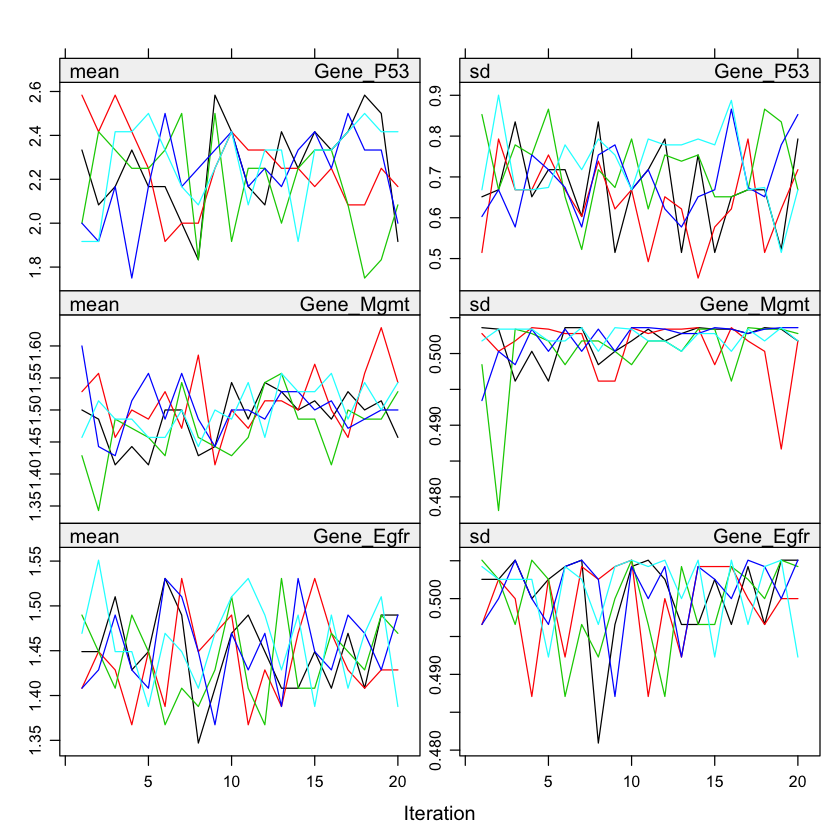

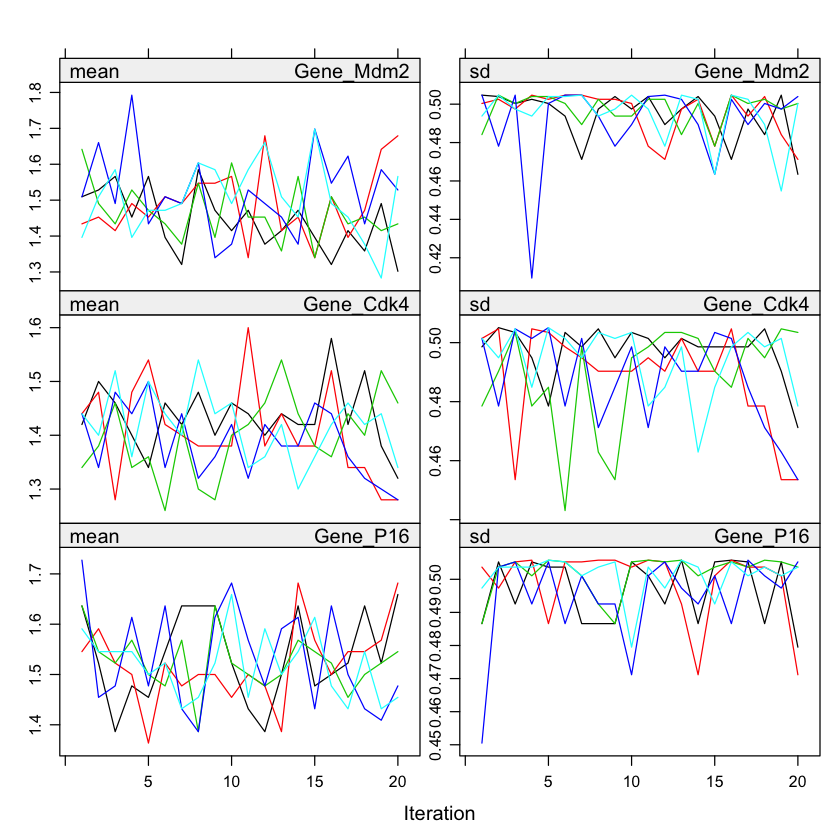

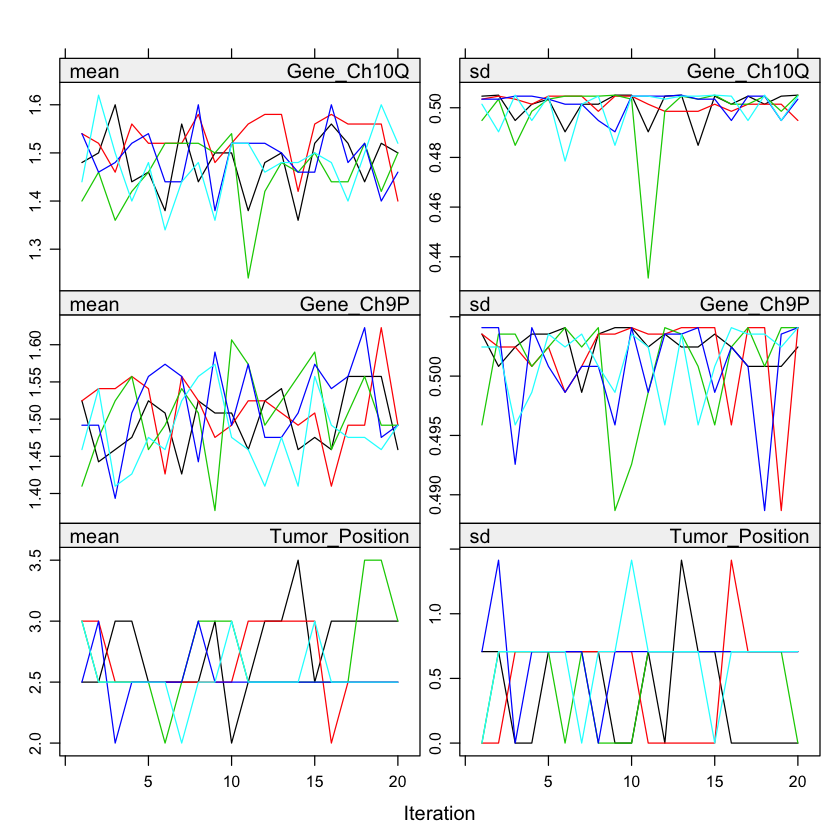

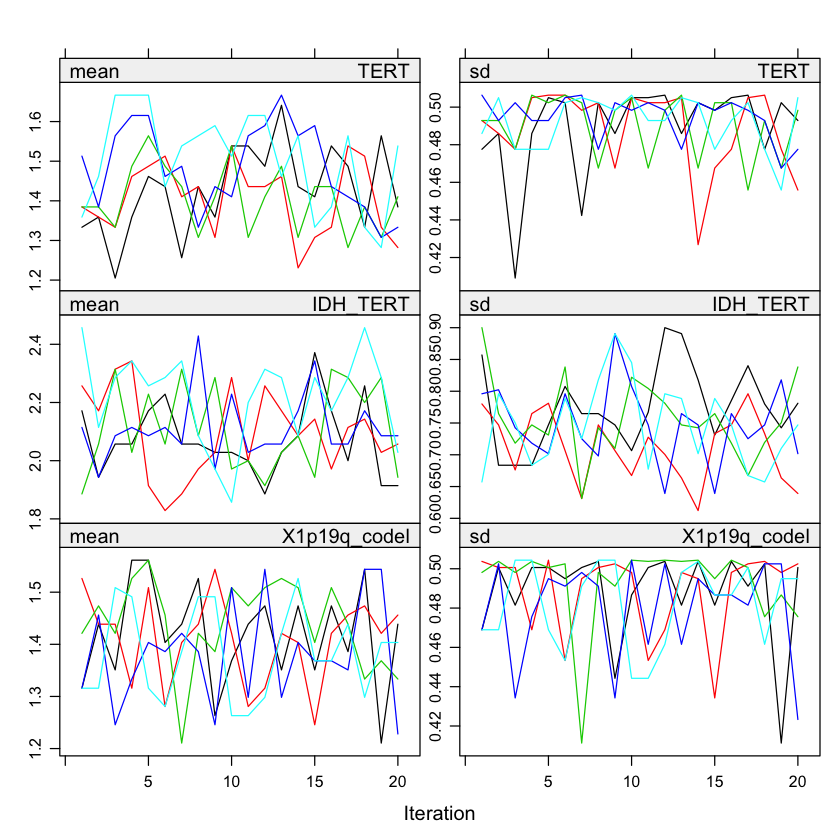

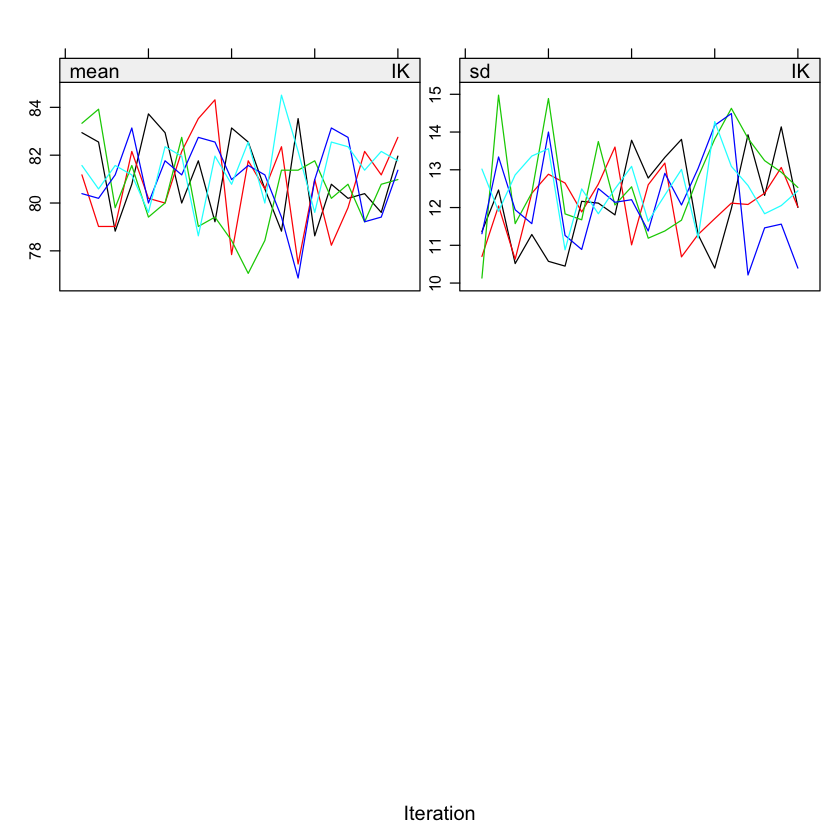

In [82]:
# we now need to inspect convergence
# for this, we plot one (or more) parameters, against the iteration
# trace plots

plot(imp)

To understand this, we need to remember that mice runs parallel chains across the number of iterations given, and imputes the missing data values based on values from the final iteration.

Convergence means that the variance between different imputation sequences is no larger than the variance within each individual sequence.

What you want to see is imputation streams that are freely intermingled with each other, without showing any specific patterns.

To better understand this and for more examples of convergence and non convergence, check p. 38-40 of Van Buuren's MICE package guide:

http://www.stefvanbuuren.nl/publications/mice%20in%20r%20-%20draft.pdf

**Note: both assessment of convergence and assessment of quality of imputations is much trickier (extremely subjective and soft) for categorical variables compared to continuous ones. There is no off the box graph/visualization/tool to our knowledge to inspect quality of categorical imputations for example.**

**4. Now assess the quality of the imputed values**

Once we assessed convergence, it is important to check the imputations.
A "good" imputed value is one that could have been observed, had it not been missing (van Buuren, 2011).

For this, we use two graphs offered by the mice package:

1. the kernel density plot, and
2. a scatterplot

both showing the distribution of observed values, versus that of imputed values.

In practice, differences between the observed and imputed values at this level are common. As such, these graphs tend to serve as a guide to the differences that arise in practice between observed and imputed values, as an additional piece of information for investigators. These differences often have their roots in the characteristics of the dataset and those of observed versus missing data (i.e. head circumference measurements were missing for all children under 2 years old in the study, as they had not been measured to begin with. In such a case you will obviously have differences between the distribution of observed values - head circumference of children older than 2 - and imputed values - head circumference of children younger than 2, which was all missing -).

Remember: blue = observed, and red = imputed.

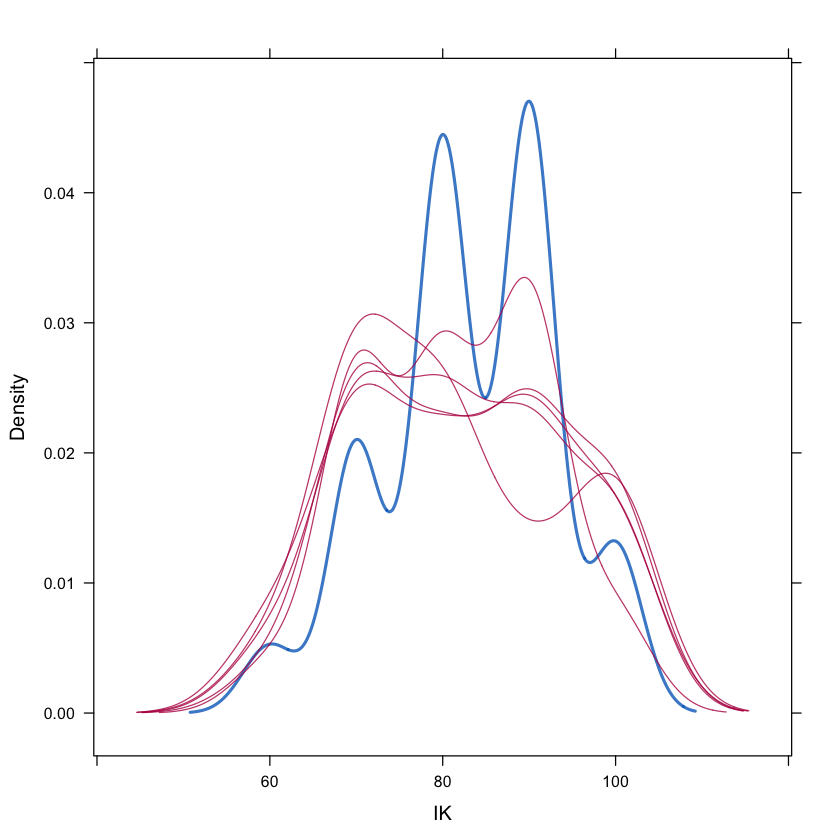

In [83]:
densityplot(imp)
#[,c("life_expectancy","IK")

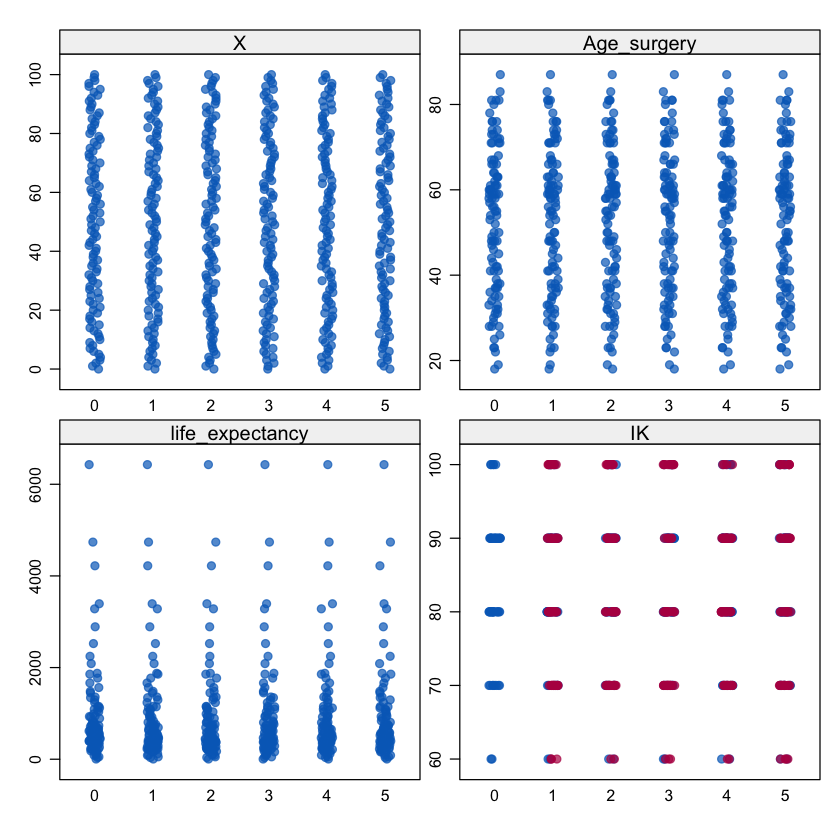

In [84]:
stripplot(imp, pch = 20, cex = 1.2)

Under MAR, it is acceptable for imputed values to be different from observed values in both location and spread.

In the strip plot graph above, we see that imputed values for IK follow the observed values for IK relatively closely. There is a concentration of values, both observed and imputed, around 90, for every imputated dataset for example. The differences between the imputed values 

Large differences however need to be investigated.

**5. Now export the imputed dataset**

Now that we have our imputed dataset, we can either analyse it in R/mice, or export it and analyze it in python or any other workflow.

In [85]:
write.csv(complete(imp), file = "imputed_dataset_no_censoring_16022018")

### If continuing analysis in R

You can perform your intended analysis in R with the with() function, per the below.
You can then easily use MICE's pool() function to apply Rubin's rules, and aggregate the results of your analyses on each imputed dataset in order to have only one combined result at the end.
Below, we use a simple example in which we apply a linear model to predict life expectancy based on the IK score; we get the summary results of our modelling; and we pool together the results.

This process, and examples, are explained in detail by Van Buuren, p. 14 and 49-50:

http://www.stefvanbuuren.nl/publications/mice%20in%20r%20-%20draft.pdf

In [86]:
fit <- with(imp, lm(life_expectancy ~ IK))

In [87]:
class(fit)

[1] "mira"   "matrix"

In [88]:
summary(fit$analyses[[2]])


Call:
lm(formula = life_expectancy ~ IK)

Residuals:
   Min     1Q Median     3Q    Max 
-899.1 -538.4 -358.1  130.9 5525.9 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  616.740    774.027   0.797    0.427
IK             3.181      9.249   0.344    0.732

Residual standard error: 1018 on 99 degrees of freedom
Multiple R-squared:  0.001194,	Adjusted R-squared:  -0.008895 
F-statistic: 0.1183 on 1 and 99 DF,  p-value: 0.7316


In [89]:
pool.fit <- pool(fit)
summary(pool.fit)

,estimate,std.error,statistic,df,p.value
(Intercept),641.488608,855.5556,0.7497918,47.79906,0.4570548
IK,2.897562,10.3027,0.2812431,47.10176,0.7797379


### If you do not want to use MICE, we added below the code for imputing a dataset using multiple imputation per the Amelia package, and using non parametric KNN per the VIM package (which also contains hot deck method, code similar to the one for KNN below).

### Amelia Multiple Imputation

In [101]:
summary(data)

       X       Gender                            Tumor_type Tumor_grade
 Min.   :  0   F:36   astrocytome                     : 9   1: 1       
 1st Qu.: 25   M:65   astrocytome gémistocytique (=A2): 2   2:14       
 Median : 50          astrocytome pilocytique         : 1   3:26       
 Mean   : 50          gangliogliome                   : 1   4:60       
 3rd Qu.: 75          GBM                             :58              
 Max.   :100          gliome                          :15              
                      oligo                           :15              
   Gene_P53        Gene_Mgmt     Gene_Egfr     Gene_Mdm2     Gene_Cdk4 
 ALTERE: 3   METHYLE    :12   AMPLIFIE:12   AMPLIFIE: 5   AMPLIFIE: 6  
 NC    :75   NON METHYLE:19   NORMAL  :40   NORMAL  :43   NORMAL  :45  
 NORMAL:11   NA's       :70   NA's    :49   NA's    :53   NA's    :50  
 NA's  :12                                                             
                                                                

Installing package into ‘/Users/aa/Library/R/3.4/library’
(as ‘lib’ is unspecified)
Warning message in amelia.prep(x = x, m = m, idvars = idvars, empri = empri, ts = ts, :
“You have a small number of observations, relative to the number, of variables in the imputation model.  Consider removing some variables, or reducing the order of time polynomials to reduce the number of parameters.”

-- Imputation 1 --

  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40
 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60
 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80
 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100
 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140
 141




Amelia output with 1 imputed datasets.
Return code:  1 
Message:  Normal EM convergence. 

Chain Lengths:
--------------
Imputation 1:  141



Amelia output with 1 imputed datasets.
Return code:  1 
Message:  Normal EM convergence. 

Chain Lengths:
--------------
Imputation 1:  141

Rows after Listwise Deletion:  0 
Rows after Imputation:  101 
Patterns of missingness in the data:  99 

Fraction Missing for original variables: 
-----------------------------------------

                Fraction Missing
X                     0.00000000
Gender                0.00000000
Tumor_type            0.00000000
Tumor_grade           0.00000000
Gene_P53              0.11881188
Gene_Mgmt             0.69306931
Gene_Egfr             0.48514851
Gene_Mdm2             0.52475248
Gene_Cdk4             0.49504950
Gene_P16              0.43564356
Gene_Ihc_Atrx         0.97029703
Gene_Ch10Q            0.49504950
Gene_Ch9P             0.60396040
Tumor_Location        0.00000000
Tumor_Position        0.01980198
Surgery_type          0.00000000
Age_surgery           0.00000000
life_expectancy       0.00000000
IDH                   0.00000000
TERT   

ERROR: Error in segments(xplot[ci.order], lowers[ci.order], xplot[ci.order], : invalid first argument


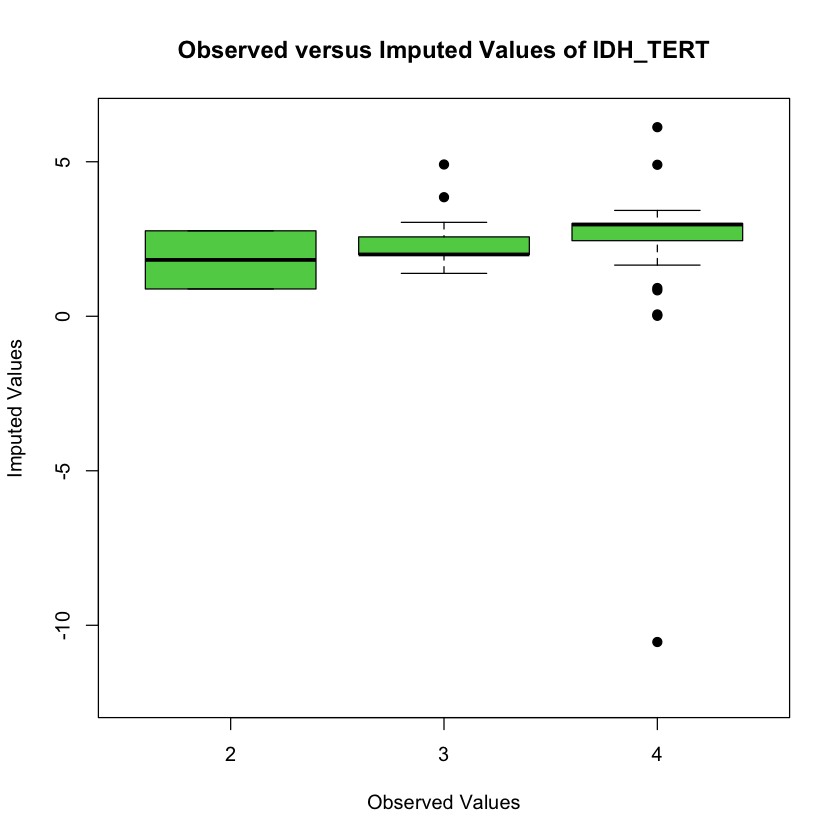

In [102]:
# load Amelia package
install.packages("Amelia")

library(Amelia)

# In Amelia coding:

# noms = categorical variables
# ords = ordinal variables
# idvars = nominal variables that should not be imputed

# if running Amelia on full dataset, it will throw an error. you need to remove either Tumor_type of Tumor_grade. Since 
# removing Tumor_type converges faster, I removed Tumor_type by adding it to idvars option. Since both Tumor_type and 
# Tumor_grade variables have no missing data, doing this does not hinder us at all.

a.out <- amelia(data, m=1, noms = c("Gender", "Tumor_grade", "Gene_P53", "Gene_Mgmt", "Gene_Egfr", "Gene_Mdm2", "Gene_Cdk4", "Gene_P16", "Gene_Ihc_Atrx", "Gene_Ch10Q", "Gene_Ch9P", "Tumor_Location", "Tumor_Position", "Surgery_type", "IDH", "TERT", "X1p19q_codel"), ords = c("IDH_TERT"), idvars = c("Tumor_type"))

#get key messages post imputation, including the expected "Normal EM convergence"

a.out

# get full summary of output dataset
summary(a.out)

# Post imputation diagnostic graphs
plot(a.out, which.vars = 4:15)
overimpute(a.out, var = "IDH_TERT")
overimpute(a.out, var = "IK")

# export dataset. Here a.out contains only one imputed dataset. If it contained 5, this would export each of them 
# in a csv named file.stem+1, file.stem+2...

write.amelia(obj=a.out, file.stem = "imputed_dataset_no_censoring_24022018_Amelia")

### KNN Imputation

In [104]:
# function from VIM package

# code categorical variables as such
data$IDH_TERT <- as.factor(data$IDH_TERT)
data$X1p19q_codel <- as.factor(data$X1p19q_codel)

# impute with KNN method, and using a k=10 parameter
imp <- kNN(data, k = 10)

# export imputed dataset

write.csv(imp, "imputed_dataset_with_censoring_16.02.2018_kNN.csv")

### Hot deck imputation

In [ ]:
# also function from VIM package

hotdeck(data)